# **Advanced Feature Extraction and Image Processing**

## Exercise 1: Harris Corner Detection

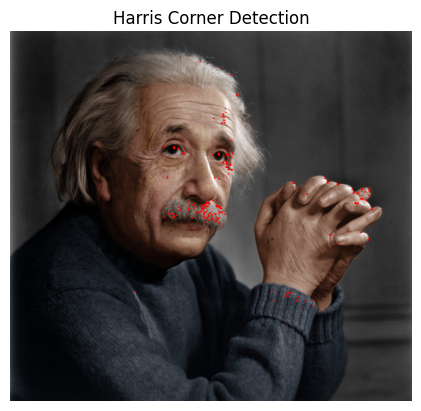

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image of your choice
image = cv2.imread('/content/EINSTEIN.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to float32 type
gray = np.float32(gray)

# Apply the Harris Corner Detection method
# The parameters are: input image, block size, ksize for Sobel, k (Harris parameter)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the result to mark the corners clearly
dst = cv2.dilate(dst, None)

# Threshold the result to find corners
threshold = 0.01 * dst.max()
image[dst > threshold] = [0, 0, 255]  # Mark corners in red

# Convert the image from BGR to RGB for proper visualization in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(image_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

**Process and Flow Explanation:**

* Load an Image: The image is loaded using cv2.imread().
* Convert to Grayscale: The image is converted to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY). This is necessary because the Harris Corner Detection algorithm works on single-channel images.
* Convert to Float32: The grayscale image is converted to float32 type using np.float32(gray). This is required by the cv2.cornerHarris() function.
* Apply Harris Corner Detection: The cv2.cornerHarris() function is used to detect corners. The parameters include the input image, block size (neighborhood size for corner detection), ksize for Sobel operation, and k (Harris parameter).
* Dilate the Result: The result is dilated to mark the corners clearly using cv2.dilate().
* Threshold to Find Corners: A threshold is applied to the result to find the corners. The corners are marked in red on the original image.
* Convert to RGB: The image is converted from BGR to RGB using cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for proper visualization in matplotlib.
* Display the Result: The result is displayed using plt.imshow() and plt.show() from the matplotlib library.

## Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction

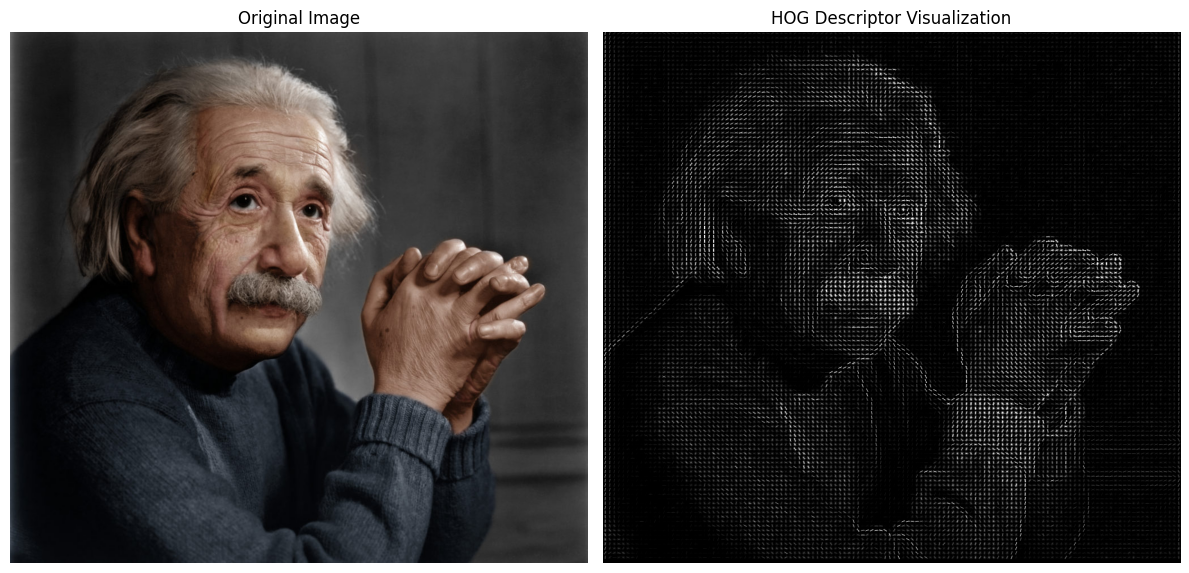

Shape of extracted HOG features: (530352,)


In [5]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load an image of a person or any object
image = cv2.imread('/content/EINSTEIN.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the HOG descriptor to extract features
# Parameters: input image, pixels per cell, cells per block, visualize flag
features, hog_image = hog(gray, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True,
                          block_norm='L2-Hys')

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

# Display the HOG visualization
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Descriptor Visualization')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Print the shape of the extracted features
print(f"Shape of extracted HOG features: {features.shape}")

**Process and Flow Explanation:**

* Load an Image: The image is loaded using cv2.imread().
* Convert to Grayscale: The image is converted to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY). This is necessary because the HOG descriptor works on single-channel images.
* Apply HOG Descriptor: The hog() function from skimage is used to compute the HOG descriptor. The parameters include the input image, pixels per cell, cells per block, and visualize flag.
* Rescale the HOG Image: The HOG image is rescaled for better visualization using exposure.rescale_intensity().
* Create a Figure: A figure with two subplots is created to display the original image and the HOG visualization.
* Display the Result: The result is displayed using plt.imshow() and plt.show() from the matplotlib library.

## Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection

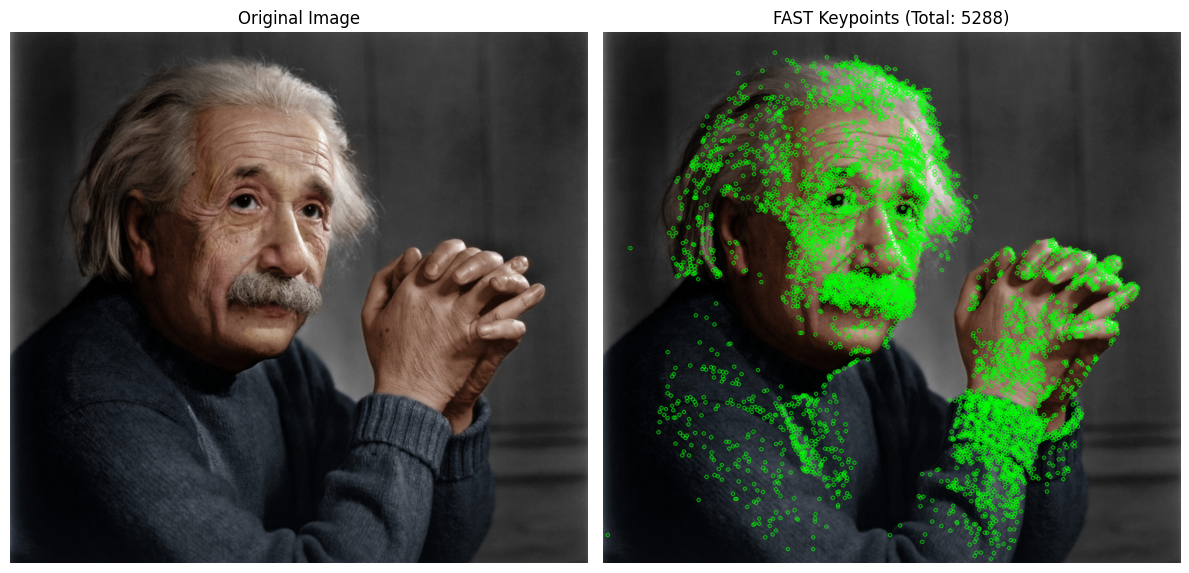

Number of keypoints detected: 5288

Default parameters of FAST detector:
Threshold: 10
nonmaxSuppression: True
Type: 2


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/EINSTEIN.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a FAST object
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Convert the image from BGR to RGB for proper visualization in matplotlib
image_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

# Display the image with keypoints
ax2.imshow(image_rgb)
ax2.set_title(f'FAST Keypoints (Total: {len(keypoints)})')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

# Optionally, you can print the default parameters of the FAST detector
print("\nDefault parameters of FAST detector:")
print(f"Threshold: {fast.getThreshold()}")
print(f"nonmaxSuppression: {fast.getNonmaxSuppression()}")
print(f"Type: {fast.getType()}")

**Process and Flow Explanation:**

* Load an Image: The image is loaded using cv2.imread().
* Convert to Grayscale: The image is converted to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY). This is necessary because the FAST feature detection algorithm works on single-channel images.
* Create a FAST Detector: A FAST detector is created using cv2.FastFeatureDetector_create().
* Detect Keypoints: The detect() method of the FAST detector is used to detect keypoints in the grayscale image.
* Draw Keypoints: The detected keypoints are drawn on the original image using cv2.drawKeypoints().
* Display the Result: The result is displayed using plt.imshow() and plt.show() from the matplotlib library.

## Exercise 4: Feature Matching using ORB and FLANN

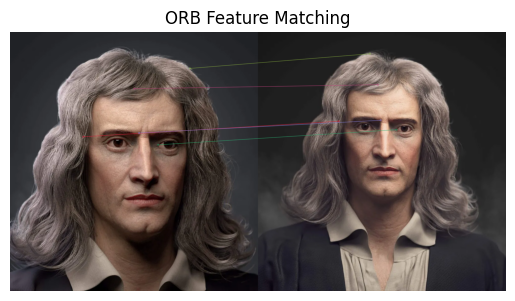

Number of good matches: 5


In [15]:
import cv2
import numpy as np

# Load two images of your choice
img1 = cv2.imread('/content/NEWTON_1.webp')
img2 = cv2.imread('/content/NEWTON_2.webp')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create an ORB detector
orb = cv2.ORB_create(nfeatures=1000)

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Create a FLANN-based matcher
index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=2)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match the descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw the matched keypoints
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert the image from BGR to RGB for proper visualization in matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(result_rgb)
plt.title('ORB Feature Matching')
plt.axis('off')
plt.show()

# Print the number of good matches
print(f"Number of good matches: {len(good_matches)}")

**Process and Flow Explanation:**

* Load Two Images: Two images are loaded using cv2.imread().
* Convert to Grayscale: The images are converted to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY). This is necessary because the ORB feature matching algorithm works on single-channel images.
* Create an ORB Detector: An ORB detector is created using cv2.ORB_create().
* Detect Keypoints and Compute Descriptors: The detectAndCompute() method of the ORB detector is used to detect keypoints and compute descriptors in both images.
* Create a FLANN-Based Matcher: A FLANN-based matcher is created using cv2.FlannBasedMatcher().
* Match Descriptors: The match() method of the FLANN-based matcher is used to match descriptors between the two images.
* Filter Good Matches: Good matches are filtered using a ratio test.
* Draw Matches: The good matches are drawn on the images using cv2.drawMatches().
* Display the Result: The result is displayed using plt.imshow() and plt.show() from the matplotlib library.

## Exercise 5: Image Segmentation using Watershed Algorithm

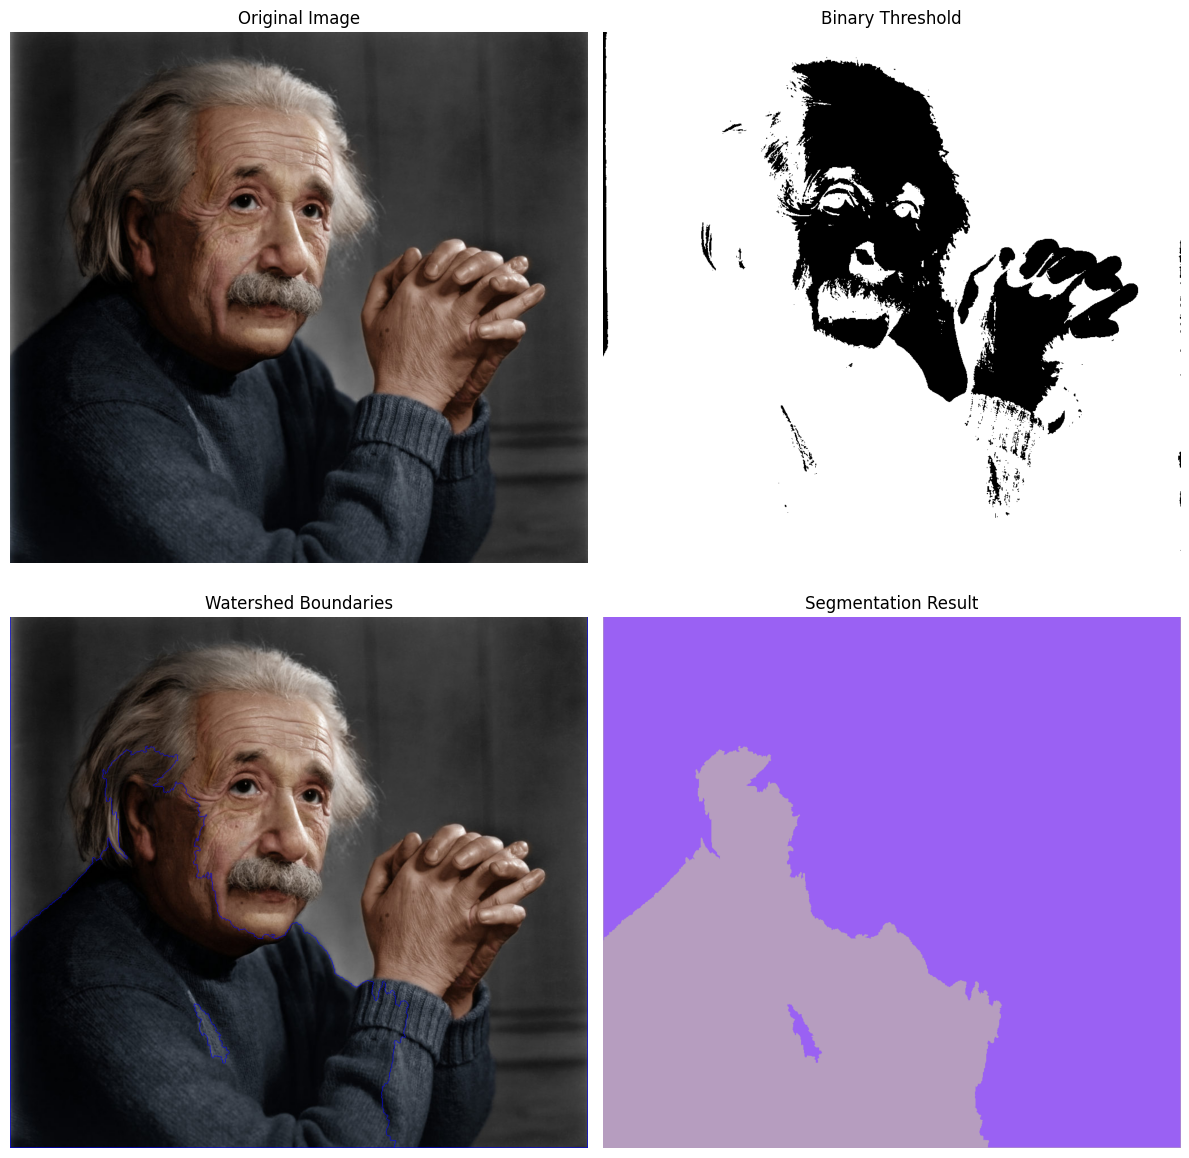

Number of segments: 2


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/EINSTEIN.jpg')
original_image = image.copy()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to get binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red

# Create a color map for visualization
color_map = np.random.randint(0, 255, size=(np.max(markers) + 1, 3), dtype=np.uint8)
color_map[0] = [0, 0, 0]  # Background color (black)

# Create segmentation result image
segmentation_result = color_map[markers]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Display original image
axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Display binary threshold image
axs[0, 1].imshow(thresh, cmap='gray')
axs[0, 1].set_title('Binary Threshold')
axs[0, 1].axis('off')

# Display image with watershed boundaries
axs[1, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Watershed Boundaries')
axs[1, 0].axis('off')

# Display segmentation result
axs[1, 1].imshow(segmentation_result)
axs[1, 1].set_title('Segmentation Result')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print the number of segments found
print(f"Number of segments: {np.max(markers)}")

**Process and Flow Explanation:**

* Load an Image: The image is loaded using cv2.imread().
* Convert to Grayscale: The image is converted to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY). This is necessary because the Watershed algorithm works on single-channel images.
* Apply Threshold: Otsu's thresholding is applied to obtain a binary image.
* Noise Removal: Morphological opening is applied to remove noise.
* Background Identification: Dilation is used to identify the sure background area.
* Foreground Identification: Distance transform and thresholding are used to identify the sure foreground area.
* Unknown Region: The unknown region is calculated by subtracting the sure foreground from the sure background.
* Marker Labeling: Connected components are found in the sure foreground area to create initial markers.
* Watershed Algorithm: The Watershed algorithm is applied using the markers.
* Visualization: The result is visualized using different colors for each segment.
* Display the Result: The result is displayed using plt.imshow() and plt.show() from the matplotlib library.